In [19]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
from collections import Counter
import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [20]:
# load data
df = pd.read_csv('D://DATA//InternSavy//task 2//OnlineRetail.csv',  encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [21]:
# From the above dataset, we will only be considering the features
# 'Quantity' and 'UnitPrice' for the array X

X = df.iloc[:, [3, 5]].values

<Axes: xlabel='Quantity'>

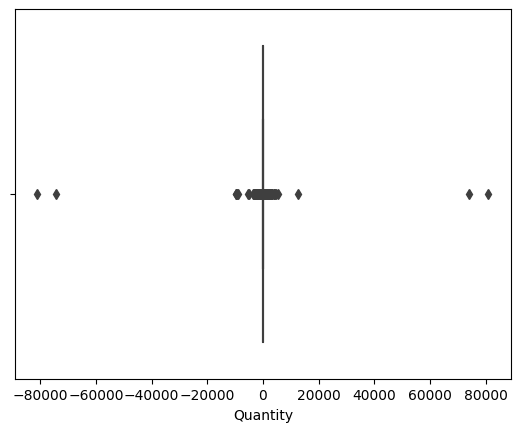

In [22]:
sns.boxplot(x=df['Quantity'])

In [23]:
df_new = df.loc[df["Quantity"]>0]
df_new = df_new.loc[df["UnitPrice"]>-1]

In [24]:
X = df_new.iloc[:, [3, 5]].values

<Axes: xlabel='UnitPrice'>

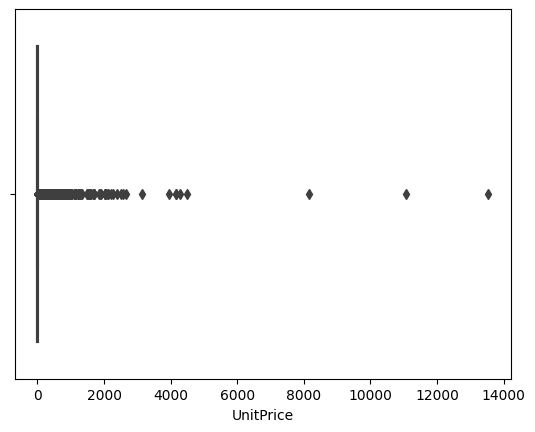

In [25]:
sns.boxplot(x=df_new['UnitPrice'])

In [26]:
from sklearn.cluster import KMeans
wcss = []

In [30]:
# We consider a range of numbers from 1 to 7
# which also denotes the number of clusters

for i in range(1, 8):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  # Fitting k-means to array X  
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

c:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

ValueError: x and y must have same first dimension, but have shapes (7,) and (0,)

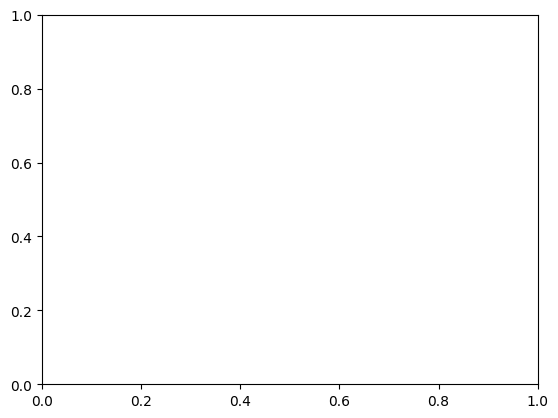

In [ ]:
plt.plot(range(1, 8), wcss[:7])
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# From the above plot, we observe that as the x-axis value goes from 1 to 3,
# the WCSS decreases rapidly, and as the x-axis value goes from 3 to 7,
# the WCSS decreases slowly.

# This tells us that the optimal number
# of clusters is 3.

# Training the k-means model on array X, 
# then predicting which cluster each transaction belongs to.

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

[0 0 0 ... 0 0 0]


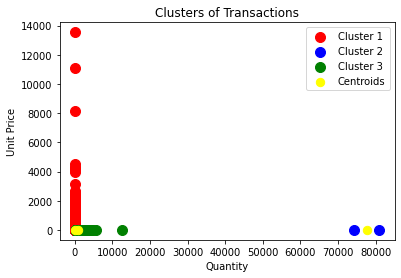

In [ ]:
# Since we considered two features, 'Quantity' and 'UnitPrice',
# it is possible for us to visualize the clusters 
# using a 2D plot / scatterplot.

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='yellow', label='Centroids')
plt.title('Clusters of Transactions')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.legend()
plt.show()